## IMPORTING LIBRARIES

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

## IMPORTING THE DATASET

In [9]:
dataset = pd.read_csv('diabetes.csv')


## LOADING THE DATASET

In [12]:
## loading the dataset
dataset

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [14]:
dataset.dtypes ## checking through the data types

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [16]:
dataset.info() ## getting the summary of the dataframe with null value

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [18]:
dataset.describe() ## viewing some statistical details

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


## DATA CLEANING

### Running through the dataset, it was observed that some columns has 0 as minimum which seems impossible medically.

## CHECKING FOR ZERO VALUES AND REPLACING WITH NAN

In [23]:
## replace zeros with nan in the missing columns and to, after then counting would be easier and replaced with suitable values.
dataset[["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]]= dataset[["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]].replace(0, np.nan)
print(dataset.isnull().sum())

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


## REPLACING MISSING VALUES

In [26]:
## filling the missing values 
## some of the columns has a skewed distribution, the mean is more affected by outliers, so median is less affected
## the columns with normal distribution, the mean is less affected.
## from histogram below glucose and bloodpressure has a normal distribution and will be replaced with mean
## also skinthickness, insulin and BMI has a skewed distribution and will be replaced with median
dataset['Glucose'].fillna(dataset['Glucose'].mean(), inplace = True) # normal distribution from histogram below
dataset['BloodPressure'].fillna(dataset['BloodPressure'].mean(), inplace = True) # normal distribution from histogram below
dataset['SkinThickness'].fillna(dataset['SkinThickness'].median(), inplace = True) # skewed distribution from histogram below
dataset['Insulin'].fillna(dataset['Insulin'].median(), inplace = True) # skewed distribution from histogram below
dataset['BMI'].fillna(dataset['BMI'].median(), inplace = True) # skewed distribution from histogram below

## DATASET AFTER CLEANING

In [29]:

dataset

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,125.0,33.6,0.627,50,1
1,1,85.0,66.0,29.0,125.0,26.6,0.351,31,0
2,8,183.0,64.0,29.0,125.0,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.0,180.0,32.9,0.171,63,0
764,2,122.0,70.0,27.0,125.0,36.8,0.340,27,0
765,5,121.0,72.0,23.0,112.0,26.2,0.245,30,0
766,1,126.0,60.0,29.0,125.0,30.1,0.349,47,1


## EXPLORATORY DATA ANALYSIS

<Axes: >

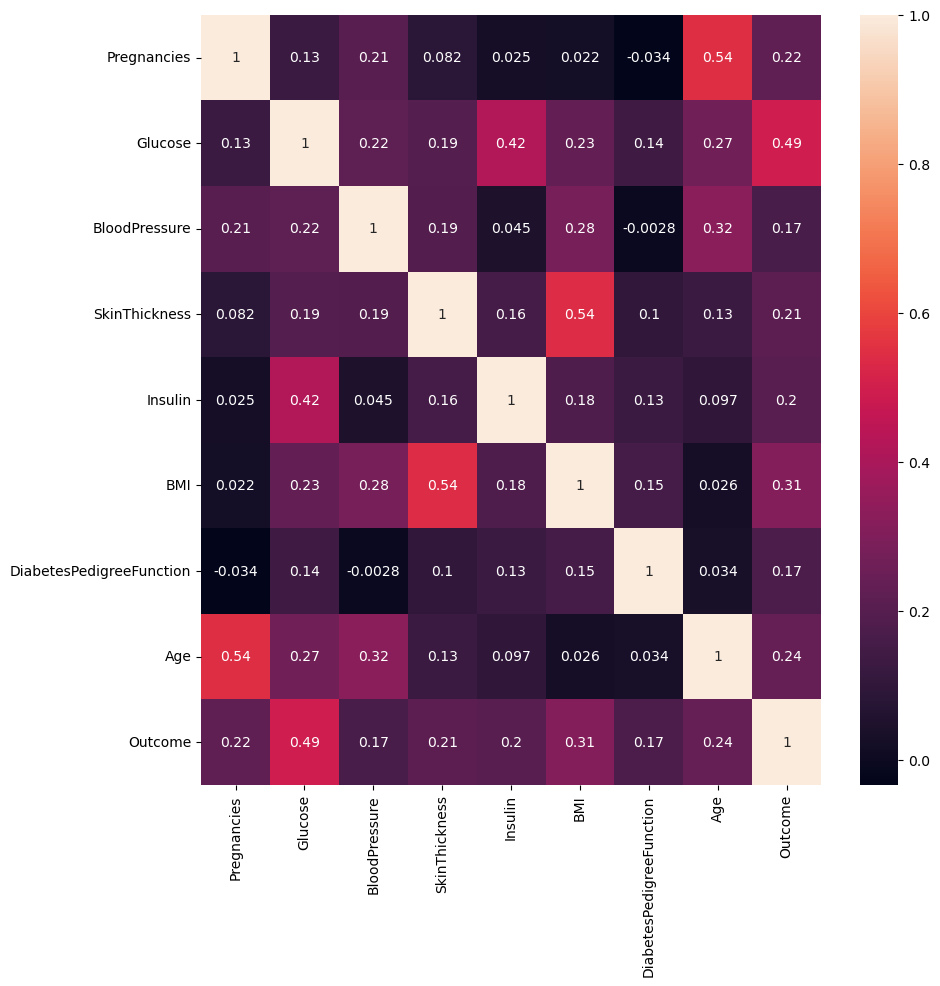

In [32]:
## Heatmap showing correlation between the variable
plt.figure(figsize=(10, 10))
corr = dataset.corr()
sns.heatmap(corr, annot = True)

In [33]:
## counting the number of diabetic and non diabetic
## 500 non diabetic and 268 diabetic
dataset['Outcome'].value_counts()


Outcome
0    500
1    268
Name: count, dtype: int64

<Axes: xlabel='Outcome', ylabel='count'>

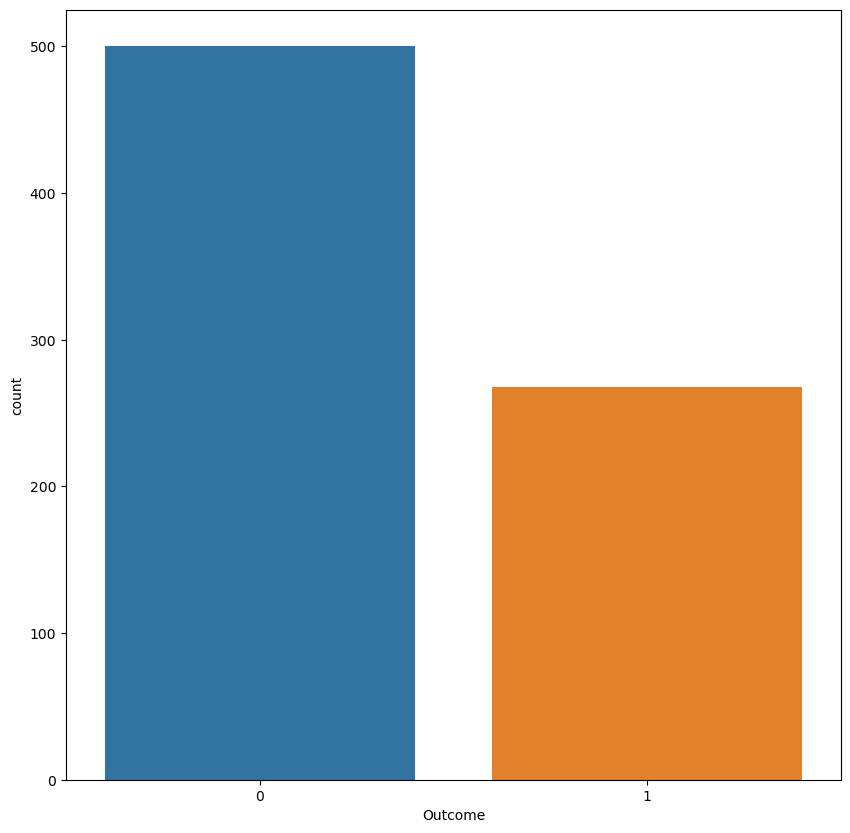

In [36]:
## graphical representation of diabetic and non diabetic 
plt.figure(figsize=(10, 10))
sns.countplot(x = 'Outcome', data = dataset)

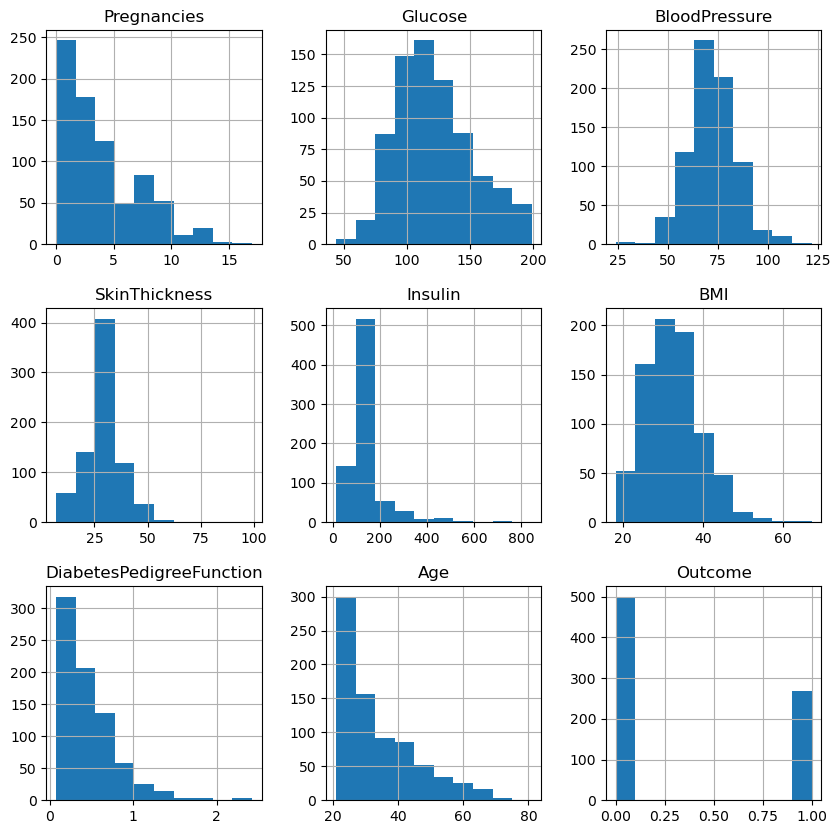

In [38]:
## histogram for each variable
dataset.hist(bins = 10, figsize = (10, 10))
plt.show()

## DATA FOR MACHINE LEARNING DEPLOYMENT

In [40]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [41]:
X ## independent variable

array([[  6.   , 148.   ,  72.   , ...,  33.6  ,   0.627,  50.   ],
       [  1.   ,  85.   ,  66.   , ...,  26.6  ,   0.351,  31.   ],
       [  8.   , 183.   ,  64.   , ...,  23.3  ,   0.672,  32.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,  26.2  ,   0.245,  30.   ],
       [  1.   , 126.   ,  60.   , ...,  30.1  ,   0.349,  47.   ],
       [  1.   ,  93.   ,  70.   , ...,  30.4  ,   0.315,  23.   ]])

In [45]:
y ## dependent variable

array([1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,

## DATA SPLITTING

In [48]:
## 20% for test and 80% for train
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size = 0.2, random_state = 0) 

## FEATURE SCALING

In [51]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)






In [53]:
print(X_train)

[[ 0.90832902  0.93627156  0.44607305 ...  0.36809107  0.67740401
   1.69955804]
 [ 0.03644676 -0.81645845 -1.05366073 ... -0.6335268  -0.07049698
  -0.96569189]
 [-1.12606292  1.43232723  1.44589558 ...  2.81490046 -0.11855487
  -0.88240283]
 ...
 [ 0.03644676 -0.91566959 -0.63706802 ... -1.13433574 -0.95656442
  -1.04898095]
 [ 2.0708387  -1.21330299  0.11279888 ... -0.36165909 -0.50001442
   0.11706589]
 [ 0.32707418  0.47328628  0.77934723 ... -0.0468649   0.52121586
   2.94889395]]


In [55]:
print(X_test)

[[-0.8354355   2.55672007  0.27943597 ...  1.46987074  2.78594417
  -0.96569189]
 [-0.54480808 -0.48575468  0.11279888 ...  0.13914985 -0.1876381
  -0.88240283]
 [ 0.03644676 -1.51093639 -0.88702365 ...  0.19638515 -0.22668514
  -0.71582471]
 ...
 [ 0.03644676  0.67170854  1.1126214  ...  1.62726783  0.53623395
  -0.96569189]
 [-0.25418066 -0.18812128  0.11279888 ... -0.90539451 -1.07971278
  -0.79911377]
 [-0.8354355  -0.48575468 -0.05383821 ... -0.26149731  1.06487079
  -0.79911377]]


In [57]:
print(y_test)

[1 0 0 1 0 0 1 1 0 0 1 1 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1
 0 0 0 0 0 0 1 1 0 0 1 1 1 0 0 1 0 0 0 0 1 1 1 1 0 0 1 1 1 1 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 1 0 0 0 1 0
 1 1 1 1 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0 1 1 0 0 0 0 0 1 0 0 0
 0 1 0 1 0 0]


In [59]:
print(y_train)

[1 0 0 0 1 1 1 1 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 1 0 1 1 0 1 1 1 0 0
 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 1 1 0 0 1 0 1 1 0 0 1 1
 0 0 0 1 0 0 1 1 0 1 0 1 0 1 0 1 0 1 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 1
 0 1 1 1 1 0 0 0 0 1 1 0 1 0 0 1 1 0 0 0 0 0 0 0 1 1 0 0 0 0 1 1 0 0 0 0 1
 0 0 1 1 0 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 1 1 1 1 0 0 0 0 0 1
 0 0 0 0 1 1 0 0 0 1 1 1 1 0 1 0 1 1 0 0 0 1 0 0 0 1 0 1 1 0 1 1 0 0 0 0 1
 1 0 0 1 1 0 0 0 0 0 1 0 1 0 0 0 1 0 1 0 1 0 1 1 1 1 0 1 1 0 0 1 1 0 0 1 1
 0 0 0 1 1 0 0 1 0 1 0 0 1 0 1 0 0 0 1 0 0 0 0 0 1 0 1 0 0 1 0 0 1 0 0 0 0
 0 0 0 0 0 1 1 0 1 0 1 1 1 0 1 0 0 1 1 0 0 0 1 0 0 1 0 1 0 0 0 0 1 0 0 0 1
 1 0 1 0 1 1 0 1 0 1 0 0 0 1 0 1 0 1 0 0 1 1 0 0 0 0 1 0 0 1 0 1 1 0 0 1 1
 0 0 0 0 1 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 1 0 0 0 1 1 0 0 0 0 0 1 0 0 1 0 1
 1 0 1 0 0 0 0 1 1 0 0 0 1 0 0 0 0 1 0 1 0 0 0 1 0 1 1 1 1 0 1 0 0 0 0 0 1
 0 1 0 1 0 0 0 1 1 0 0 1 1 0 1 0 0 1 0 0 1 0 0 0 0 0 1 1 1 1 0 0 1 1 0 0 0
 1 0 0 0 1 0 0 0 0 0 0 1 

# CLASSIFICATION ALGORITHMS



## LOGISTIC REGRESSION MODEL 

In [63]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

## PREDICTING THE TEST SET RESULT

In [66]:
lr_pred = classifier.predict(X_test)

act_pred = pd.DataFrame({'Actual value': y_test, 'Predicted value':lr_pred})
act_pred

,Actual value,Predicted value
0,1,1
1,0,0
2,0,0
3,1,1
4,0,0
...,...,...
149,1,0
150,0,0
151,1,1
152,0,0


## MAKING THE CONFUSION AND ACCURACY SCORE

In [69]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, lr_pred)
print(cm) ## confusion matrix
accuracy_score(y_test, lr_pred) ## accuracy score

[[97 10]
 [19 28]]


0.8116883116883117

## CLASSIFICATION REPORT

In [72]:
#import classification_report
from sklearn.metrics import classification_report
print(classification_report(y_test,lr_pred))

              precision    recall  f1-score   support

           0       0.84      0.91      0.87       107
           1       0.74      0.60      0.66        47

    accuracy                           0.81       154
   macro avg       0.79      0.75      0.76       154
weighted avg       0.81      0.81      0.81       154



## PLOTTING THE ROC CURVE

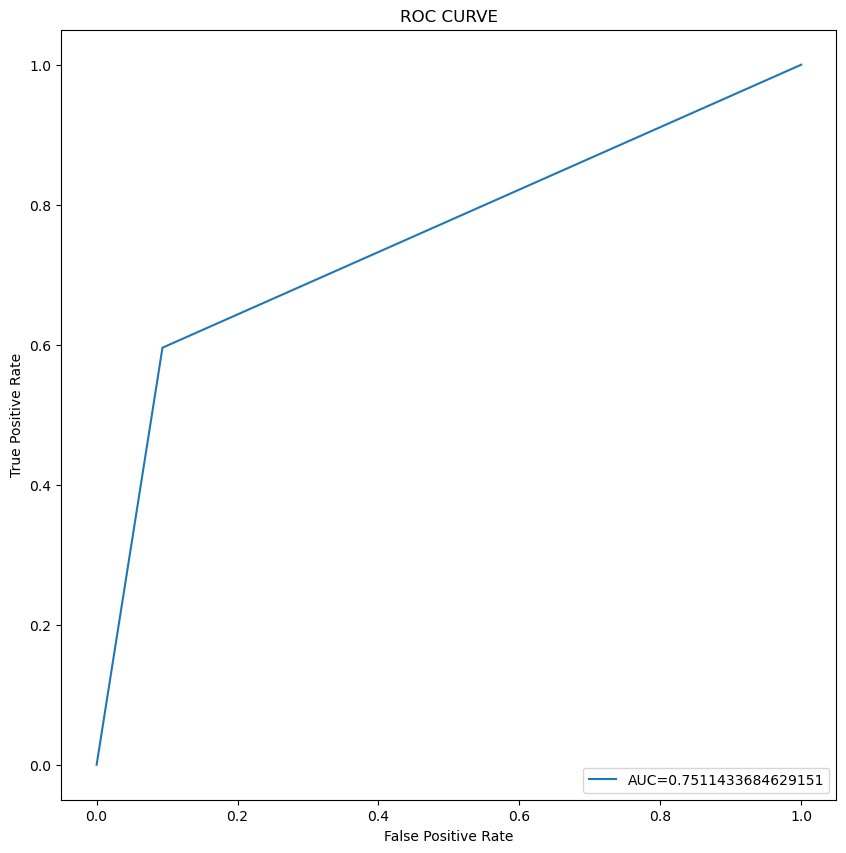

In [75]:
#define metrics
fpr, tpr, _ = metrics.roc_curve(y_test,  lr_pred)
auc = metrics.roc_auc_score(y_test, lr_pred)

#create ROC curve
plt.figure(figsize= (10, 10))
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.title('ROC CURVE')
plt.show()

## K-NEAREST NEIGHBOR (K-NN)

## TRAINING THE K-NN MODEL ON THE TRAINING SET

In [79]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)

KNeighborsClassifier()

## PREDICTING THE TEST SET RESULTS

In [82]:
knn_pred = classifier.predict(X_test)

knn_act_pred = pd.DataFrame({'Actual value': y_test, 'Predicted value':knn_pred})
knn_act_pred

,Actual value,Predicted value
0,1,1
1,0,0
2,0,0
3,1,1
4,0,0
...,...,...
149,1,0
150,0,0
151,1,0
152,0,0


## MAKING THE CONFUSION MATRIX AND ACCURACY SCORE

In [85]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, knn_pred)
print(cm)
accuracy_score(y_test, knn_pred)

[[88 19]
 [17 30]]


0.7662337662337663

## CLASSIFICATION REPORT

In [88]:
#import classification_report
from sklearn.metrics import classification_report
print(classification_report(y_test, knn_pred))

              precision    recall  f1-score   support

           0       0.84      0.82      0.83       107
           1       0.61      0.64      0.62        47

    accuracy                           0.77       154
   macro avg       0.73      0.73      0.73       154
weighted avg       0.77      0.77      0.77       154



## PLOTTING THE ROC CURVE

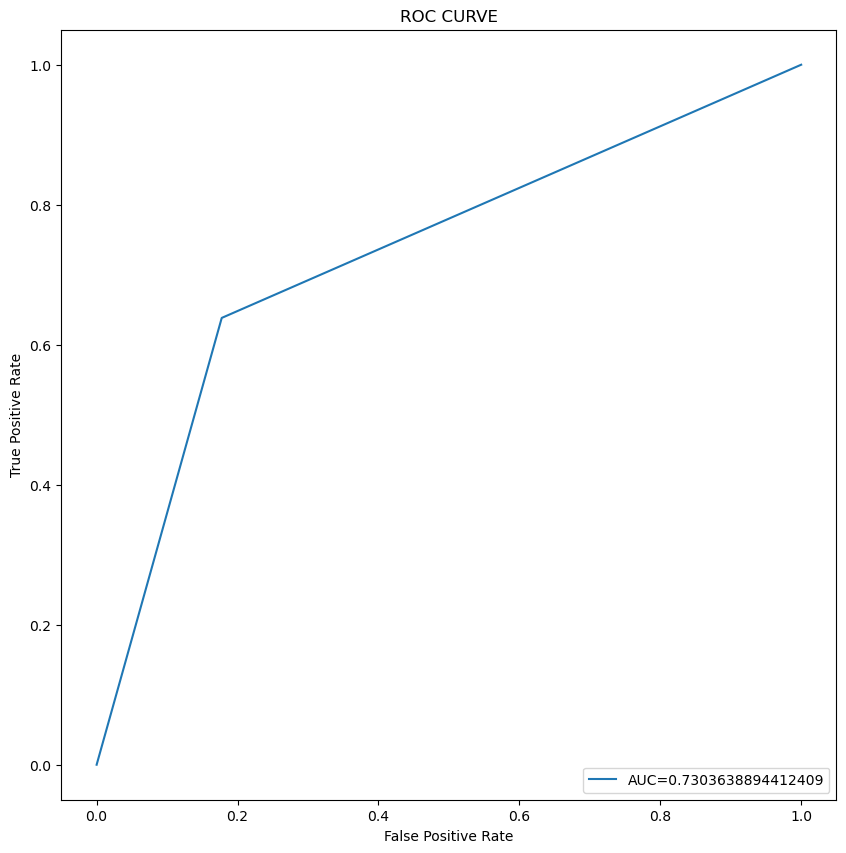

In [91]:
#define metrics
fpr, tpr, _ = metrics.roc_curve(y_test,  knn_pred)
auc = metrics.roc_auc_score(y_test, knn_pred)

#create ROC curve
plt.figure(figsize= (10, 10))
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.title('ROC CURVE')
plt.show()

## SUPPORT VECTOR MACHINE

## TRAINING THE SVM MODEL ON THE TRAINING SET 

In [95]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train, y_train)

SVC(kernel='linear', random_state=0)

## PREDICTING THE TEST SET RESULT

In [98]:
svm_pred = classifier.predict(X_test)
svm_act_pred = pd.DataFrame({'Actual value': y_test, 'Predicted value':svm_pred})
svm_act_pred

,Actual value,Predicted value
0,1,1
1,0,0
2,0,0
3,1,1
4,0,0
...,...,...
149,1,0
150,0,0
151,1,1
152,0,0


## MAKING THE CONFUSION MATRIX AND ACCURACY SCORE

In [101]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, svm_pred)
print(cm)
accuracy_score(y_test, svm_pred)

[[97 10]
 [20 27]]


0.8051948051948052

## CLASSIFICATION REPORT

In [104]:
#import classification_report
from sklearn.metrics import classification_report
print(classification_report(y_test,svm_pred))

              precision    recall  f1-score   support

           0       0.83      0.91      0.87       107
           1       0.73      0.57      0.64        47

    accuracy                           0.81       154
   macro avg       0.78      0.74      0.75       154
weighted avg       0.80      0.81      0.80       154



## PLOTTING THE ROC CURVE

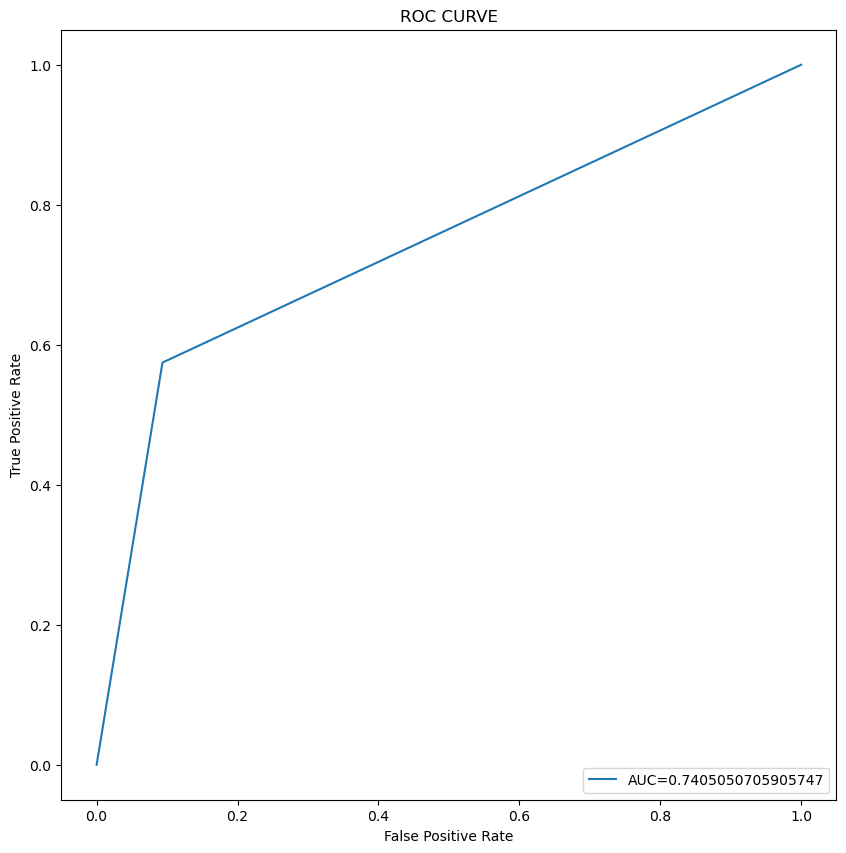

In [107]:
#define metrics
fpr, tpr, _ = metrics.roc_curve(y_test,  svm_pred)
auc = metrics.roc_auc_score(y_test, svm_pred)

#create ROC curve
plt.figure(figsize= (10, 10))
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.title('ROC CURVE')
plt.show()

## NAIVE BAYES

## TRAINING THE NAIVE BAYES MODEL ON THE TRAINING SET

In [111]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB()

## PREDICTING THE TEST SET RESULT

In [114]:
nb_pred = classifier.predict(X_test)
nb_act_pred = pd.DataFrame({'Actual value': y_test, 'Predicted value':nb_pred})
nb_act_pred

,Actual value,Predicted value
0,1,1
1,0,0
2,0,0
3,1,1
4,0,0
...,...,...
149,1,0
150,0,0
151,1,1
152,0,0


## MAKING THE CONFUSION MATRIX AND ACCURACY SCORE

In [117]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, nb_pred)
print(cm)
accuracy_score(y_test, nb_pred)

[[92 15]
 [18 29]]


0.7857142857142857

## CLASSIFICATION REPORT

In [120]:
#import classification_report
from sklearn.metrics import classification_report
print(classification_report(y_test,nb_pred))

              precision    recall  f1-score   support

           0       0.84      0.86      0.85       107
           1       0.66      0.62      0.64        47

    accuracy                           0.79       154
   macro avg       0.75      0.74      0.74       154
weighted avg       0.78      0.79      0.78       154



## PLOTTING THE ROC CURVE

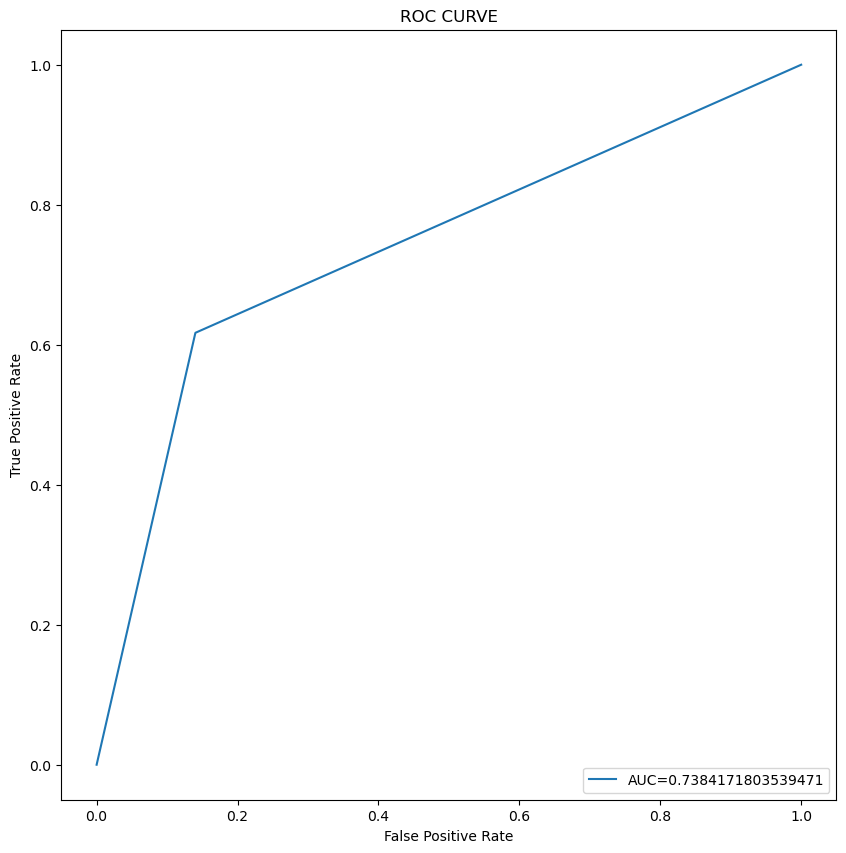

In [123]:
#define metrics
fpr, tpr, _ = metrics.roc_curve(y_test,  nb_pred)
auc = metrics.roc_auc_score(y_test, nb_pred)

#create ROC curve
plt.figure(figsize= (10, 10))
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.title('ROC CURVE')
plt.show()

## RANDOM FOREST CLASSIFICATION

## TRAINING THE RANDOM FOREST CLASSIFICATION MODEL ON THE TRAINING SET

In [127]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)


RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

## PREDICTING THE TEST SET RESULT

In [130]:
rf_pred = classifier.predict(X_test)
rf_act_pred = pd.DataFrame({'Actual value': y_test, 'Predicted value':rf_pred})
rf_act_pred

,Actual value,Predicted value
0,1,1
1,0,0
2,0,0
3,1,0
4,0,0
...,...,...
149,1,0
150,0,0
151,1,0
152,0,0


## MAKING THE CONFUSION MATRIX AND ACCURACY SCORE

In [133]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, rf_pred)
print(cm)
accuracy_score(y_test, rf_pred)

[[95 12]
 [22 25]]


0.7792207792207793

## CLASSIFICATION REPORT

In [136]:
#import classification_report
from sklearn.metrics import classification_report
print(classification_report(y_test, rf_pred))

              precision    recall  f1-score   support

           0       0.81      0.89      0.85       107
           1       0.68      0.53      0.60        47

    accuracy                           0.78       154
   macro avg       0.74      0.71      0.72       154
weighted avg       0.77      0.78      0.77       154



## PLOTTING THE ROC CURVE

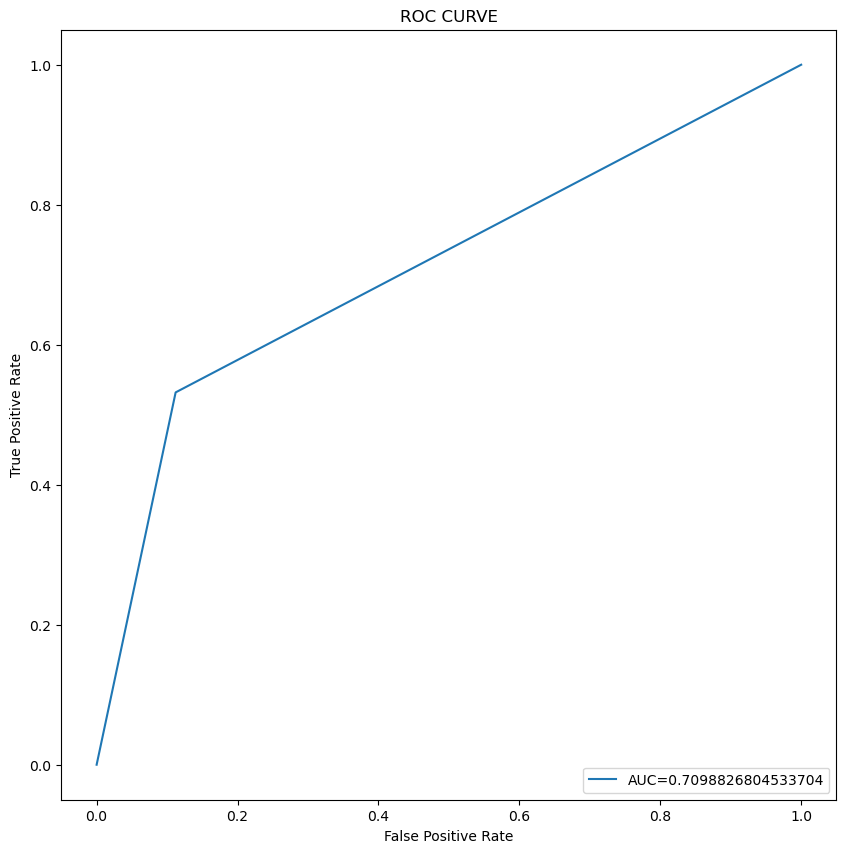

In [139]:
#define metrics
fpr, tpr, _ = metrics.roc_curve(y_test,  rf_pred)
auc = metrics.roc_auc_score(y_test, rf_pred)

#create ROC curve
plt.figure(figsize= (10, 10))
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.title('ROC CURVE')
plt.show()

## DECISION TREE CLASSIFICATION

## TRAINING THE DECISION TREE CLASSIFICATION MODEL ON THE TRAINING SET

In [143]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

## PREDICTING THE TEST SET RESULT

In [146]:
dt_pred = classifier.predict(X_test)
dt_act_pred = pd.DataFrame({'Actual value': y_test, 'Predicted value':dt_pred})
dt_act_pred

,Actual value,Predicted value
0,1,1
1,0,1
2,0,0
3,1,1
4,0,0
...,...,...
149,1,0
150,0,0
151,1,0
152,0,0


## MAKING THE CONFUSION MATRIX AND ACCURACY SCORE

In [149]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(dt_pred, y_test)
print(cm)
accuracy_score(y_test, dt_pred)

[[78 18]
 [29 29]]


0.6948051948051948

In [151]:
#import classification_report
from sklearn.metrics import classification_report
print(classification_report(y_test,dt_pred))

              precision    recall  f1-score   support

           0       0.81      0.73      0.77       107
           1       0.50      0.62      0.55        47

    accuracy                           0.69       154
   macro avg       0.66      0.67      0.66       154
weighted avg       0.72      0.69      0.70       154



## PLOTTING THE ROC CURVE

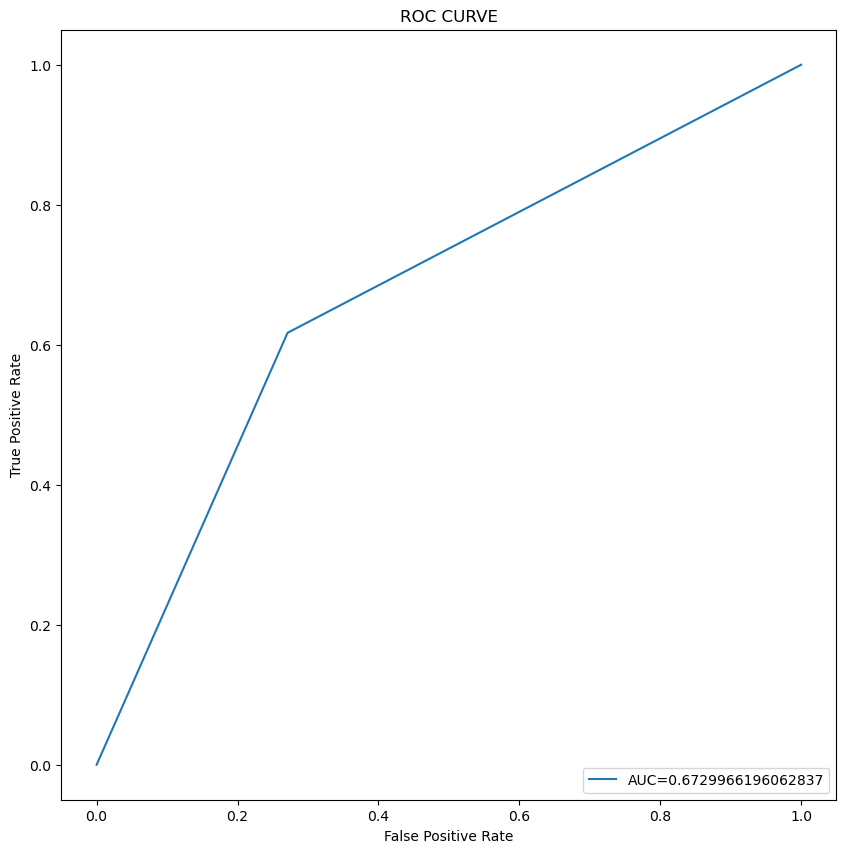

In [154]:
#define metrics
fpr, tpr, _ = metrics.roc_curve(y_test,  dt_pred)
auc = metrics.roc_auc_score(y_test, dt_pred)

#create ROC curve
plt.figure(figsize= (10, 10))
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.title('ROC CURVE')
plt.show()